In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
plt.ion()

import seaborn as sns
sns.set(font_scale=1.2, style='white')
import numpy as np

# Load data

In [2]:
url_data = "https://github.com/jupyterhub/binder-data/raw/master/billing/data/proc/data.json"
data = pd.read_json(url_data, orient='split')
data['date'] = pd.to_datetime(data['date'])

# Cost over time

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


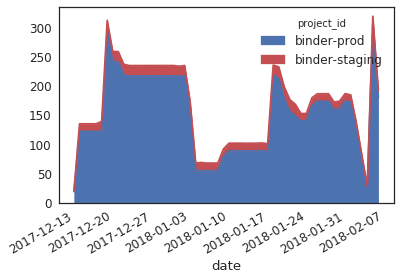

In [3]:
costs = data.groupby(['project_id', 'date']).sum()['cost'].unstack('project_id')
costs.plot.area(stacked=True, colors=["C0", "C2"])

# Costs by week

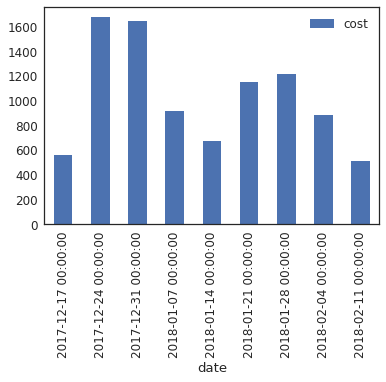

In [4]:
ax = data.set_index('date').resample('W').sum().plot.bar()

# Plot by category

In [5]:
categories = data.groupby(['date', 'category', 'line_item']).sum()['cost'].\
    unstack(['category', 'line_item'])

sort_categories = categories.sum(0)
sort_categories = sort_categories.sort_values(ascending=False).index

categories = categories[sort_categories]

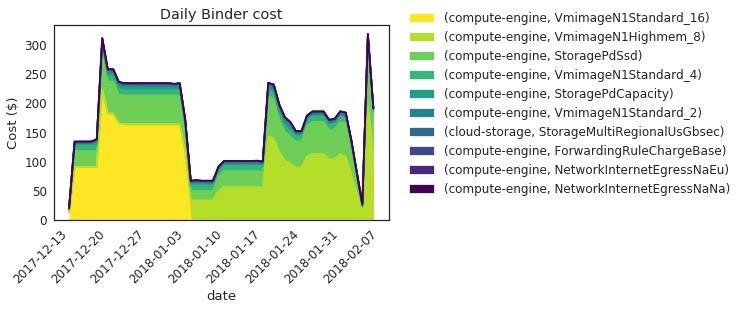

In [6]:
ax = categories.iloc[:, :10].plot.area(cmap=plt.cm.viridis_r)
ax.legend(loc=(1.05, .1), framealpha=0)
ax.set(title="Daily Binder cost", ylabel="Cost ($)")
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

# % Category

In [7]:
totals = categories.sum(0).unstack('line_item').sum(0)
totals /= totals.sum()
totals *= 100
totals = totals[totals > .1].sort_values(ascending=False)

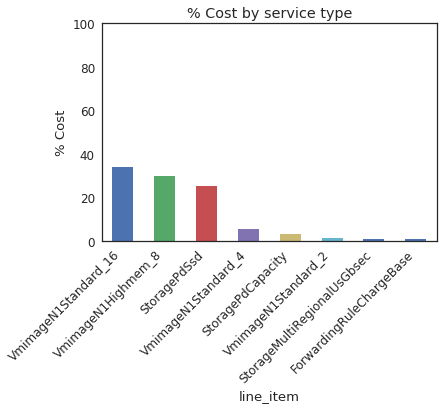

In [8]:
ax = totals.plot.bar()
ax.set(ylim=[0, 100], ylabel="% Cost", title="% Cost by service type")
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right');